In [6]:
#MIDTERM CODE 
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

train_data = pd.read_csv('/kaggle/input/dm-dataset-2/model_dataset.csv')
# Prepare the features and target variable
X = train_data.drop(['id', 'score'], axis=1)
y = train_data['score']

# Create a cross-validation scheme
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define a function to evaluate the model and print MSE
def evaluate_model(pipeline, X, y, kf):
    scores = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')
    mean_mse = -scores.mean()
    return mean_mse

# Create and evaluate a Lasso regression pipeline
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.5, random_state=42))
])
mean_mse_lasso = evaluate_model(lasso_pipeline, X, y, kf)

# Create and evaluate a Linear Regression pipeline
linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])
mean_mse_linear = evaluate_model(linear_pipeline, X, y, kf)

# Create and evaluate a Ridge regression pipeline
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0, random_state=42))
])
mean_mse_ridge = evaluate_model(ridge_pipeline, X, y, kf)

# Print the MSE for each model
#print(f"Lasso Regression Mean Squared Error (Cross-Validated): {mean_mse_lasso}")
#print(f"Linear Regression Mean Squared Error (Cross-Validated): {mean_mse_linear}")
#print(f"Ridge Regression Mean Squared Error (Cross-Validated): {mean_mse_ridge}")


# Function to perform cross-validation and calculate MAE
def evaluate_model_mae(pipeline, X, y, kf):
    mae_scores = []
    for train_index, test_index in kf.split(X):
        # Split data into training and test sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Fit the model
        pipeline.fit(X_train, y_train)
        
        # Make predictions
        y_pred = pipeline.predict(X_test)
        
        # Calculate MAE
        mae = mean_absolute_error(y_test, y_pred)
        mae_scores.append(mae)
    
    # Return the average MAE
    return sum(mae_scores) / len(mae_scores)

# Evaluate each model and calculate MAE
mae_lasso = evaluate_model_mae(lasso_pipeline, X, y, kf)
mae_linear = evaluate_model_mae(linear_pipeline, X, y, kf)
mae_ridge = evaluate_model_mae(ridge_pipeline, X, y, kf)

# Print the MAE for each model
mae_lasso, mae_linear, mae_ridge


(0.7172115536761924, 0.5605017975271478, 0.5598387820373321)

In [7]:
#Final code
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, KFold

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
dataset = pd.read_csv('/kaggle/input/dm-dataset-2/model_dataset.csv')
# Separating features and target variable
X = dataset.drop(['id', 'score'], axis=1)
y = dataset['score']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
def k_fold_cross_validation(X, y, k=5):
    fold_sizes = (len(X) // k) * np.ones(k, dtype=int)
    fold_sizes[:len(X) % k] += 1
    current = 0
    indices = np.arange(len(X))
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        test_indices = indices[start:stop]
        train_indices = np.concatenate([indices[:start], indices[stop:]])
        yield train_indices, test_indices
        current = stop
# Custom Linear Regression with Gradient Descent
class LinearRegressionGD:
    def __init__(self, learning_rate=0.001, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            model = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (model - y))
            db = (1 / n_samples) * np.sum(model - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Custom Ridge Regression with Gradient Descent




(0.5953266949561306, 0.6028025875477379)

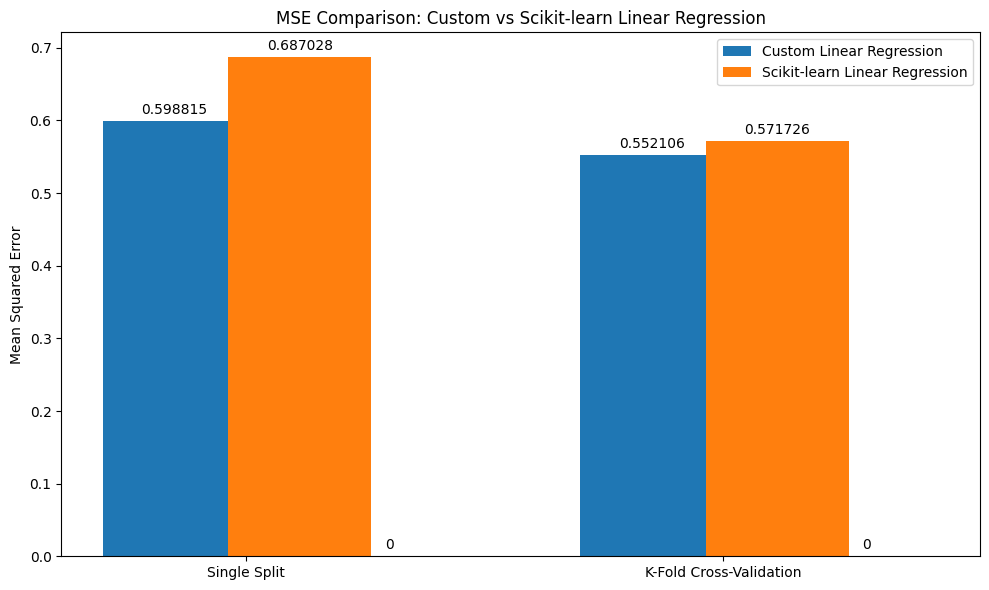

In [9]:
#Final Code
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Load dataset
dataset = pd.read_csv('/kaggle/input/dm-dataset-2/model_dataset.csv')

# Separate features and target variable
X = dataset.drop(['id', 'score'], axis=1)
y = dataset['score']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_splits = 5

# K-Fold Cross-Validation


# Calculate average MSE for K-Fold Cross-Validation
custom_linear_mse_folds = []
sklearn_linear_mse_folds = []

# K-Fold Cross-Validation
for train_index, test_index in k_fold_cross_validation(X_scaled, y, k=n_splits):
    # Splitting data
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and evaluate custom linear regression
    lin_reg_custom = LinearRegressionGD(learning_rate=0.01, n_iterations=1000)
    lin_reg_custom.fit(X_train, y_train)
    predictions_custom_linear = lin_reg_custom.predict(X_test)
    custom_linear_mse_folds.append(mean_squared_error(y_test, predictions_custom_linear))

    # Train and evaluate scikit-learn linear regression
    lin_reg_sklearn = LinearRegression()
    lin_reg_sklearn.fit(X_train, y_train)
    predictions_sklearn_linear = lin_reg_sklearn.predict(X_test)
    sklearn_linear_mse_folds.append(mean_squared_error(y_test, predictions_sklearn_linear))

# Calculate average MSE for K-Fold Cross-Validation
average_mse_custom_linear = np.mean(custom_linear_mse_folds)
average_mse_sklearn_linear = np.mean(sklearn_linear_mse_folds)

# Store single train-test split MSE for comparison
single_split_mse_custom_linear = mse_custom_linear
single_split_mse_sklearn_linear = mse_sklearn_linear

# Prepare data for visualization
mse_data = {
    'Custom Linear Regression': [single_split_mse_custom_linear, average_mse_custom_linear],
    'Scikit-learn Linear Regression': [single_split_mse_sklearn_linear, average_mse_sklearn_linear]
}








import matplotlib.pyplot as plt

# Data for plotting
labels = ['Single Split', 'K-Fold Cross-Validation']
custom_mse = mse_data['Custom Linear Regression']
sklearn_mse = mse_data['Scikit-learn Linear Regression']

x = np.arange(len(labels))  # the label locations
width = 0.3  # Decreased width of the bars

# Create a larger figure size for the plot
plt.figure(figsize=(10, 6))
ax = plt.subplot()

rects1 = ax.bar(x - width/2, custom_mse, width, label='Custom Linear Regression')
rects2 = ax.bar(x + 0.75*width/2, sklearn_mse, width, label='Scikit-learn Linear Regression')
rects3 = ax.bar(x + 2*width/2, [0], width, label='')
# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Mean Squared Error')
ax.set_title('MSE Comparison: Custom vs Scikit-learn Linear Regression')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adding labels on top of the bars
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
plt.tight_layout()
plt.show()


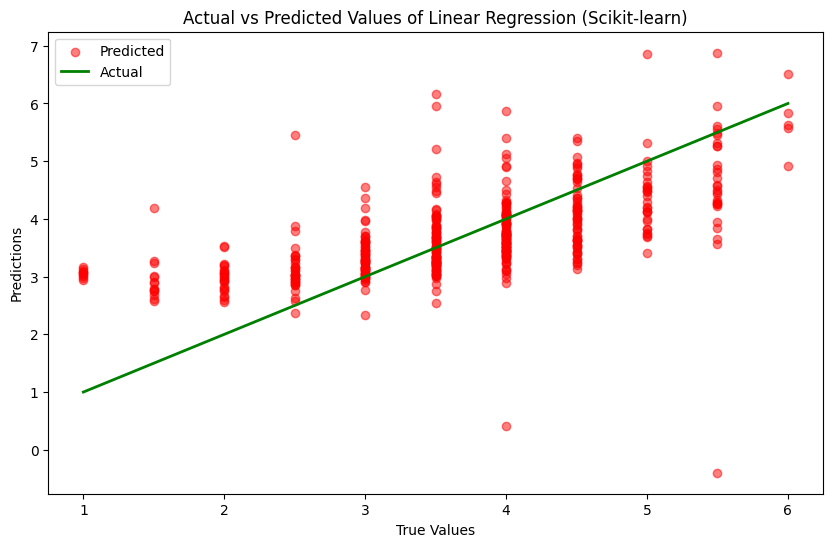

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_sklearn_linear, color='red', alpha=0.5, label='Predicted')
# Plot a line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'green', linewidth=2, label='Actual')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Actual vs Predicted Values of Linear Regression (Scikit-learn)')
plt.legend()
plt.show()
